In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
from sklearn.ensemble import RandomForestRegressor
from google.colab import files
import io
import requests

In [ ]:
# Step 0.2: Load the Excel file
url = 'https://raw.githubusercontent.com/Shari2k20/Stockinfo/main/GOOGL.xlsx'
xls = pd.ExcelFile(url)
data = pd.read_excel(url, sheet_name = 'GOOGL-M')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2079 non-null   datetime64[ns]
 1   Open       2079 non-null   float64       
 2   High       2079 non-null   float64       
 3   Low        2079 non-null   float64       
 4   Close      2079 non-null   float64       
 5   Adj Close  2079 non-null   float64       
 6   Volume     2079 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 113.8 KB
None


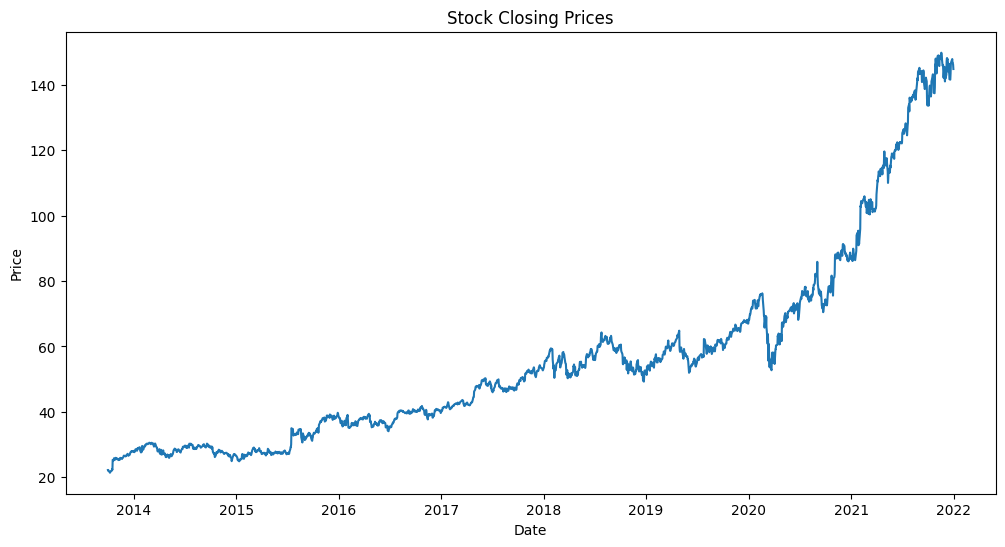

In [ ]:
# Step 2: Visualize the Data through trend plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Step 3: Prepare the Data for Modeling
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(2)
data = data.dropna().reset_index(drop=True)
X = data[['Open', 'High', 'Low', 'Volume', 'Close_lag1', 'Close_lag2']]
y = data['Close']
print(data.head())
print(data.index)

        Date       Open       High        Low      Close  Adj Close  \
0 2013-10-03  22.222221  22.374874  21.824324  21.924173  21.870020   
1 2013-10-04  21.896896  21.959709  21.771772  21.830582  21.776659   
2 2013-10-07  21.707958  21.871622  21.624374  21.665165  21.611652   
3 2013-10-08  21.654655  21.671171  21.312061  21.363113  21.310345   
4 2013-10-09  21.428429  21.587837  21.095596  21.417917  21.365013   

      Volume  Close_lag1  Close_lag2  
0   84595320   22.221972   22.197197  
1   54265680   21.924173   22.221972  
2   51692256   21.830582   21.924173  
3   77670252   21.665165   21.830582  
4  105945948   21.363113   21.665165  
RangeIndex(start=0, stop=2077, step=1)


In [ ]:
# Step 4: Split the Data into Training and Testing Sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
split_date = data['Date'][split_index]

X_train = X[data['Date'] < split_date]
y_train = y[data['Date'] < split_date]
X_test = X[data['Date'] >= split_date]
y_test = y[data['Date'] >= split_date]

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1661, 6)
X_test shape: (416, 6)
y_train shape: (1661,)
y_test shape: (416,)


In [ ]:
# Step 5: Scale the Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 6: Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Step 7: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)

Mean Squared Error: 0.36320338959911297
Mean Absolute Error: 0.46693216773672397
R^2 Score: 0.9995006254443372


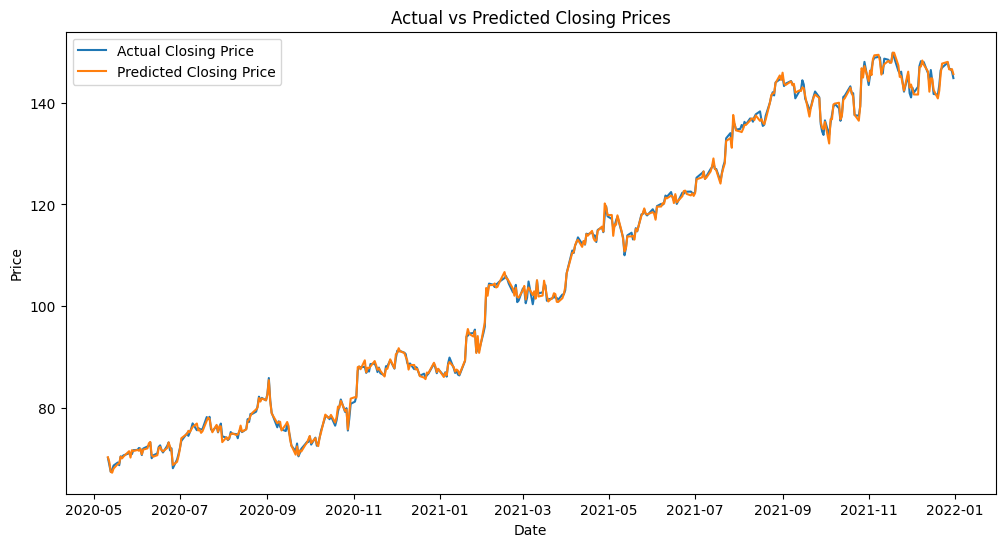

In [ ]:
# Step 8: Visualize the Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][split_index:], y_test, label='Actual Closing Price')
plt.plot(data['Date'][split_index:], y_pred, label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("")

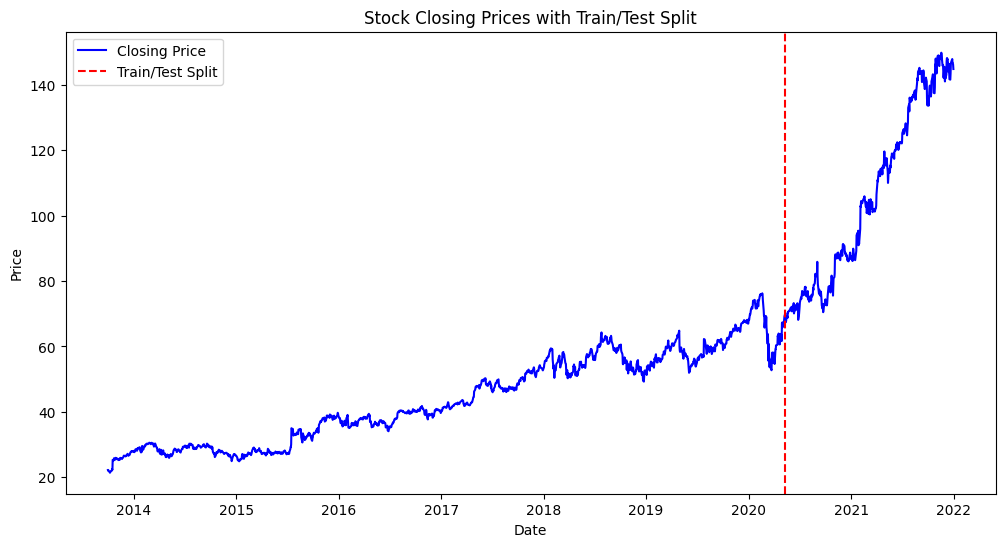

In [ ]:
# Plot the entire closing prices with the split point
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.axvline(x=split_date, color='red', linestyle='--', label='Train/Test Split')
plt.title('Stock Closing Prices with Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
X_train

,Open,High,Low,Volume,Close_lag1,Close_lag2
0,22.222221,22.374874,21.824324,84595320,22.221972,22.197197
1,21.896896,21.959709,21.771772,54265680,21.924173,22.221972
2,21.707958,21.871622,21.624374,51692256,21.830582,21.924173
3,21.654655,21.671171,21.312061,77670252,21.665165,21.830582
4,21.428429,21.587837,21.095596,105945948,21.363113,21.665165
...,...,...,...,...,...,...
1656,65.406502,66.223503,64.800499,30806000,65.865997,67.334999
1657,66.875000,68.550499,66.751503,39666000,66.144997,65.865997
1658,67.900002,68.434502,67.256500,31732000,67.450996,66.144997
1659,68.065498,68.800003,67.626999,30652000,67.271500,67.450996


In [ ]:
data4 = xls.parse('GOOGL-V')

data4

,Date,MarketCap,EnterpriseValue,PeRatio,ForwardPeRatio,PegRatio,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Qtr Stock Price
0,2013-12-31,376366922148,326874922148,32.226,22.371,1.488,6.594,4.535,5.696,18.227,25.407611
1,2014-03-31,532677223674,480475223674,30.945,18.315,1.217,6.318,6.110,8.031,25.946,29.254078
2,2014-06-30,392018013768,340985013768,32.277,19.342,1.466,6.388,4.315,5.474,17.669,27.613715
3,2014-09-30,395352513496,342278513496,30.814,19.418,1.294,6.169,4.174,5.254,17.065,29.468352
4,2014-12-31,359503564697,304684564697,28.236,17.889,1.430,5.357,3.658,4.487,14.706,27.315696
5,2015-03-31,376199382578,318803382578,27.366,17.153,1.657,5.774,3.627,4.830,14.271,27.088828
6,2015-06-30,363461833080,303260833080,26.812,16.695,1.364,5.478,3.413,4.470,13.440,27.468405
7,2015-09-30,428655184860,364108184860,31.744,19.194,1.553,6.321,3.927,5.231,15.646,32.194211
8,2015-12-31,528168435200,460632435200,36.019,23.095,2.161,7.489,4.600,6.419,19.187,37.007719
9,2016-03-31,517784506950,451078506950,33.402,22.472,1.722,7.050,4.354,6.015,18.176,36.814426


In [ ]:
# Define the split ratio
split_ratio = 0.8
split_index = int(len(data4) * split_ratio)

# Split the data
train_data = data4.iloc[:split_index]
test_data = data4.iloc[split_index:]

print(data4.head())

        Date     MarketCap  EnterpriseValue  PeRatio  ForwardPeRatio  \
0 2013-12-31  376366922148     326874922148   32.226          22.371   
1 2014-03-31  532677223674     480475223674   30.945          18.315   
2 2014-06-30  392018013768     340985013768   32.277          19.342   
3 2014-09-30  395352513496     342278513496   30.814          19.418   
4 2014-12-31  359503564697     304684564697   28.236          17.889   

   PegRatio  PsRatio  PbRatio  EnterprisesValueRevenueRatio  \
0     1.488    6.594    4.535                         5.696   
1     1.217    6.318    6.110                         8.031   
2     1.466    6.388    4.315                         5.474   
3     1.294    6.169    4.174                         5.254   
4     1.430    5.357    3.658                         4.487   

   EnterprisesValueEBITDARatio  Qtr Stock Price  
0                       18.227        25.407611  
1                       25.946        29.254078  
2                       17.669        

In [ ]:
# Features
features = ['PeRatio', 'PbRatio', 'EnterprisesValueEBITDARatio']

X_train = train_data[features]
X_test = test_data[features]

# Target variable
y_train = train_data['Qtr Stock Price']
y_test = test_data['Qtr Stock Price']

# Print the shape to check the split
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (26, 11)
Test data shape: (7, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)


In [ ]:
# Linear Regression metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Performance:')
print('Mean Squared Error:', mse_lr)
print('Mean Absolute Error:', mae_lr)
print('R² Score:', r2_lr)


Linear Regression Performance:
Mean Squared Error: 311.8665707363023
Mean Absolute Error: 15.684518858145967
R² Score: 0.5900837216153804


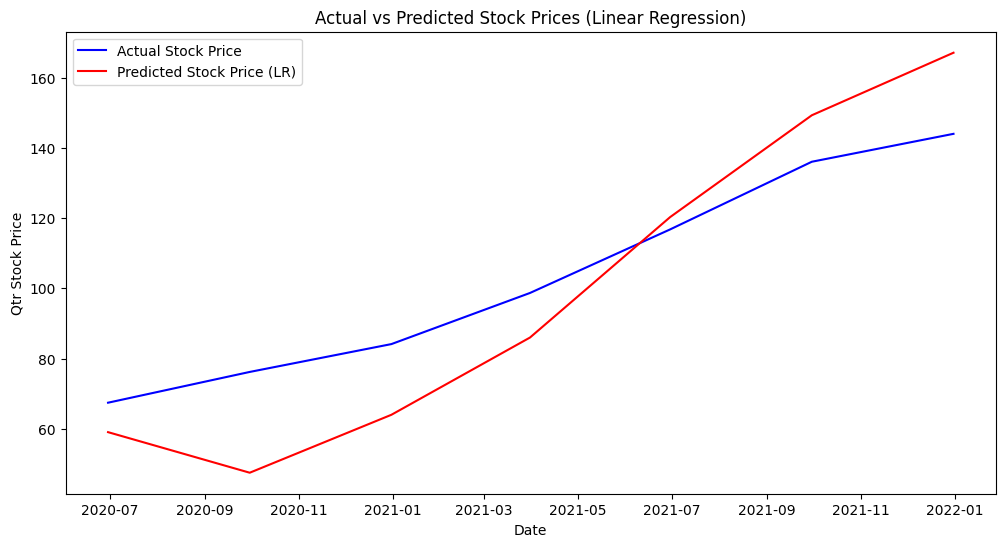

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test.values, label='Actual Stock Price', color='blue')
plt.plot(test_data['Date'], y_pred_lr, label='Predicted Stock Price (LR)', color='red')
plt.xlabel('Date')
plt.ylabel('Qtr Stock Price')
plt.title('Actual vs Predicted Stock Prices (Linear Regression)')
plt.legend()
plt.show()

In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Create and train the model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # For reproducibility
    )
    rf_model.fit(X_train_scaled, y_train)

    # Evaluate the model and return the MSE
    y_pred = rf_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')  # Minimize MSE
study.optimize(objective, n_trials=100)  # Number of trials to run

# Get the best hyperparameters
best_params = study.best_params
# Initialize the model
rf_model = RandomForestRegressor(**best_params, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

[I 2024-11-22 02:42:00,948] A new study created in memory with name: no-name-b42637bd-36dd-4c4a-8506-d84a25cf943a
[I 2024-11-22 02:42:01,130] Trial 0 finished with value: 3934.7508811936086 and parameters: {'n_estimators': 136, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 3934.7508811936086.
[I 2024-11-22 02:42:01,202] Trial 1 finished with value: 3917.111172240802 and parameters: {'n_estimators': 54, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 1 with value: 3917.111172240802.
[I 2024-11-22 02:42:01,415] Trial 2 finished with value: 4082.23663828215 and parameters: {'n_estimators': 170, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 3917.111172240802.
[I 2024-11-22 02:42:01,528] Trial 3 finished with value: 3759.306331032965 and parameters: {'n_estimators': 88, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 3 with value: 3759.306

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=82,
                      random_state=42)

In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# Random Forest metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regressor Performance:')
print('Mean Squared Error:', mse_rf)
print('Mean Absolute Error:', mae_rf)
print('R² Score:', r2_rf)

Random Forest Regressor Performance:
Mean Squared Error: 3628.316947396053
Mean Absolute Error: 53.47703175772119
R² Score: -3.769046507180856


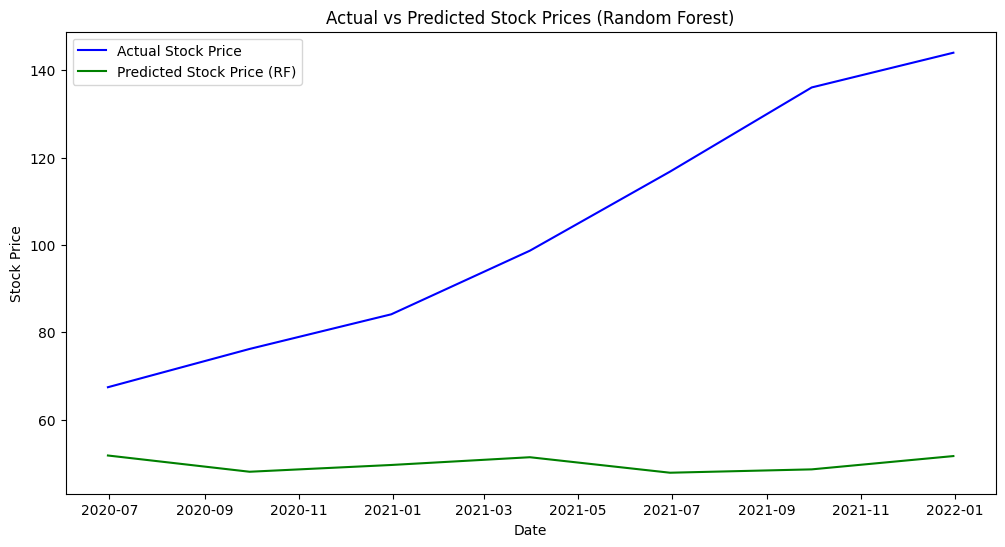

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test.values, label='Actual Stock Price', color='blue')
plt.plot(test_data['Date'], y_pred_rf, label='Predicted Stock Price (RF)', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices (Random Forest)')
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame to compare the metrics
performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'MAE': [mae_lr, mae_rf],
    'R2_Score': [r2_lr, r2_rf]
})

print(performance)

               Model          MSE        MAE  R2_Score
0  Linear Regression   311.866571  15.684519  0.590084
1      Random Forest  3628.316947  53.477032 -3.769047


In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Feature  Importance
1                      PbRatio    0.500996
0                      PeRatio    0.385213
2  EnterprisesValueEBITDARatio    0.113792


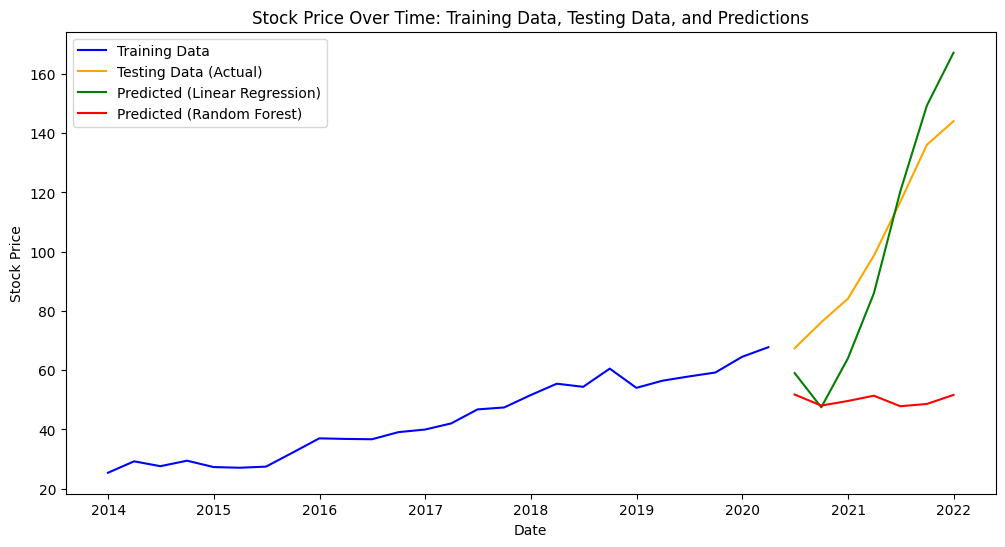

In [ ]:
# Plot training data, testing data, and predictions from two models
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data['Date'], y_train.values, label='Training Data', color='blue')

# Plot testing data (actual)
plt.plot(test_data['Date'], y_test.values, label='Testing Data (Actual)', color='orange')

# Plot predictions from Linear Regression
plt.plot(test_data['Date'], y_pred_lr, label='Predicted (Linear Regression)', color='green')

# Plot predictions from Random Forest
plt.plot(test_data['Date'], y_pred_rf, label='Predicted (Random Forest)', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time: Training Data, Testing Data, and Predictions')
plt.legend()

# Show the plot
plt.show()